In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [2]:
import numpy as np
import pandas as pd

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [7]:
from sklearn.metrics import accuracy_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

load_breast_cancer()

## 학습데이터 80 vs 테스트데이터 20

## tree 계열의 알고리즘을 3개만 쓰셔서 예측정확도를 한번 뽑아봅시다
dt_clf
rf_clf
ada_clf
gbm

### 회기분석에서 파생된 clf
lr_clf

In [ ]:
cancer = load_breast_cancer()

# X값들을 살펴보자.
cancer_ftrs = cancer.data
# y값들을 살펴보자.
cancer_target = cancer.target

cancer_df = pd.DataFrame(cancer_ftrs, columns=cancer.feature_names)

cancer_df['label'] = cancer_target
cancer_df  # y값은 암환자 유무 0 : 정상인, 1 : 환자

In [31]:
cancer_df.isna().sum()  # 결측값 확인

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [ ]:
# train test_split을 통한 데이터 분할

In [34]:
X_train, X_test, y_train, y_test = train_test_split(cancer_ftrs, cancer_target, test_size=0.2,stratify=cancer_target)

In [53]:
### 알고리즘 3개를 써서 분석해봅시다
from sklearn.metrics import accuracy_score as acc_sc
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

def get_index(y_test, pred):
    accuracy = acc_sc(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    f_score = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred)

    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, Recall:{2:.4f}, F1:{3:.4f}, roc:{4: .4f}'.format(accuracy, p_score, r_score, f_score, roc_auc))

### dt_clf
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
dt_clf.predict(X_test)
pred_dt = dt_clf.predict(X_test)
#
# acc_sc(y_test, pred_dt)
get_index(y_test, pred_dt)

### rf_clf
from sklearn.tree import DecisionTreeClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rf_clf.predict(X_test)
pred_rf = rf_clf.predict(X_test)
#
# acc_sc(y_test, pred_dt)
get_index(y_test, pred_rf)

정확도 : 0.9649, 정밀도 : 0.9595, Recall:0.9861, F1:0.9726, roc: 0.9573
정확도 : 0.9737, 정밀도 : 0.9726, Recall:0.9861, F1:0.9793, roc: 0.9692


In [ ]:
# conda install lightgbm

In [59]:
## 새로운 알고리즘인 LightGBM을 사용해본다.
from lightgbm import LGBMClassifier

# n_estimators=400그루를 설정
# 일반적인 알고리즘의 객체화
lgbm_wrapper = LGBMClassifier(n_estimators=400)

# LightGBM early_stopping_rounds 확인
evals = [(X_test, y_test)]

## LGBM 학습 및 예측
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals,
                 verbose=True)
# verbose True -> 값 보임, verbose False -> 값 안보임

[1]	valid_0's binary_logloss: 0.576931
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.512849
[3]	valid_0's binary_logloss: 0.456612
[4]	valid_0's binary_logloss: 0.411604
[5]	valid_0's binary_logloss: 0.376214
[6]	valid_0's binary_logloss: 0.341354
[7]	valid_0's binary_logloss: 0.311057
[8]	valid_0's binary_logloss: 0.284628
[9]	valid_0's binary_logloss: 0.261664
[10]	valid_0's binary_logloss: 0.243349
[11]	valid_0's binary_logloss: 0.227012
[12]	valid_0's binary_logloss: 0.212087
[13]	valid_0's binary_logloss: 0.199399
[14]	valid_0's binary_logloss: 0.188643
[15]	valid_0's binary_logloss: 0.178903
[16]	valid_0's binary_logloss: 0.170129
[17]	valid_0's binary_logloss: 0.162039
[18]	valid_0's binary_logloss: 0.153937
[19]	valid_0's binary_logloss: 0.148913
[20]	valid_0's binary_logloss: 0.141803
[21]	valid_0's binary_logloss: 0.137783
[22]	valid_0's binary_logloss: 0.133089
[23]	valid_0's binary_logloss: 0.129195
[24]	valid_0's binary_loglo

LGBMClassifier(n_estimators=400)

In [60]:
pred_lgbm = lgbm_wrapper.predict(X_test)

get_index(y_test, pred_lgbm)

정확도 : 0.9737, 정밀도 : 0.9726, Recall:0.9861, F1:0.9793, roc: 0.9692


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

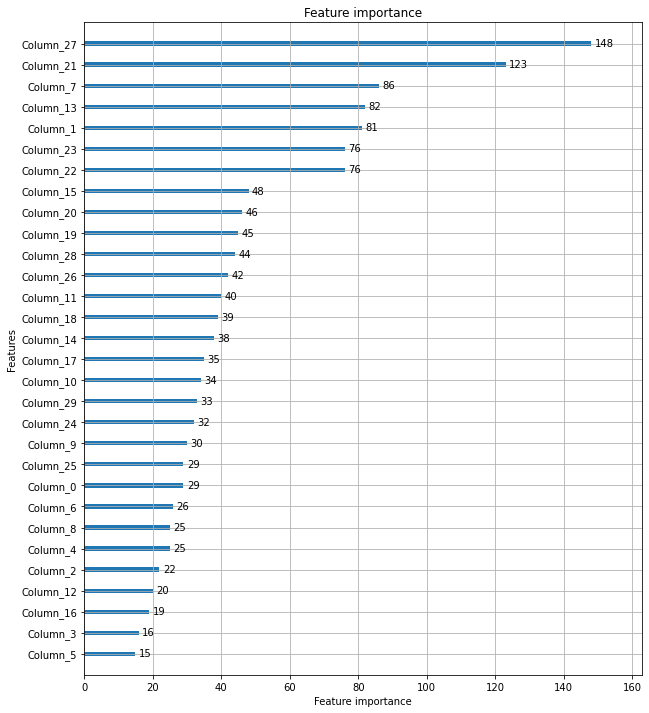

In [63]:
### lgbm을 통한 주요 컬럼 추출
from lightgbm import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper, ax=ax)

In [62]:
print(cancer_df.columns[21])
print(cancer_df.columns[1])
print(cancer_df.columns[27])

worst texture
mean texture
worst concave points


In [ ]:
# end of file